## CM3430 Computational Statistics  
### Take-Home Assignment  

**Index No:** 215554D  
**Name:** SABAR S.A.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle
from pandas.plotting import parallel_coordinates
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Load dataset
df = pd.read_csv('data/heart.csv')

# Preview the dataset
print(df.head())

   age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   63    1   3     145   233    1        0       150     0      2.3    0   
1   37    1   2     130   250    0        1       187     0      3.5    0   
2   41    0   1     130   204    0        0       172     0      1.4    2   
3   56    1   1     120   236    0        1       178     0      0.8    2   
4   57    0   0     120   354    0        1       163     1      0.6    2   

   caa  thall  output  
0    0      1       1  
1    0      2       1  
2    0      2       1  
3    0      2       1  
4    0      2       1  


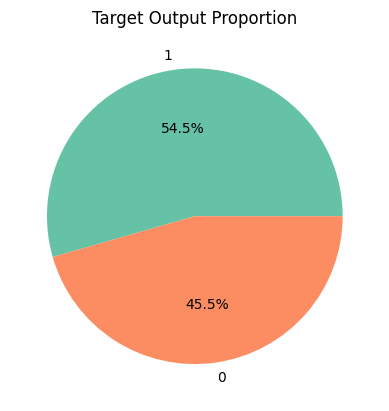

In [3]:
# Calculate class proportions
target_counts = df['output'].value_counts()

# Plot pie chart
target_counts.plot.pie(autopct='%1.1f%%', colors=['#66c2a5', '#fc8d62'], labels=target_counts.index)
plt.title('Target Output Proportion')
plt.ylabel('')
plt.show()

Conclusion: class is balanced

#####  1. Create three visual representations of the dataset using the techniques covered in Chapter 1.

### Geometric Projection Techniques

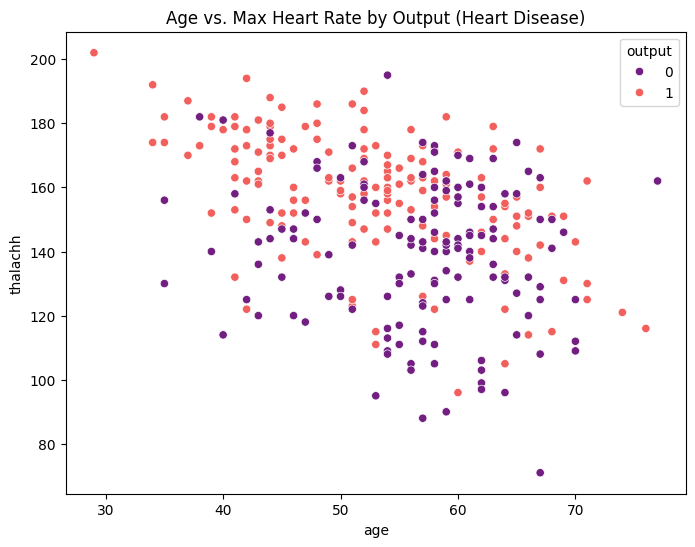

In [4]:
# 01. Scatter plot: Age vs. Maximum Heart Rate, colored by output
plt.figure(figsize=(8, 6))

sns.scatterplot(data=df, x='age', y='thalachh', hue='output', palette='magma')
plt.title('Age vs. Max Heart Rate by Output (Heart Disease)')

#plt.xlabel('Output (0: No Heart Disease, 1: Heart Disease)')
plt.show()

We use Surface Plots to visualize the relationship between three variables using a scatter plot. Here I've taken **age**, **maximum heart rate**, and **output** for the thress variables.  

**Axes:**  
  * X-axis (Age): Represents the age of individuals in the dataset.
  * Y-axis (Max Heart Rate Achieved): Reflects the maximum heart rate achieved during exercise.
    
**Points**
  * Each point represents a person.
    
**Color of the points**
  * 0: No Heart Disease represented by purple, 1: Heart Disease represented by salmon pink.

      ---

#### Comments on the Plot  

* From the graph we can see that there is a gradual decline in the maximum heart rate with age.
* Individuals with heart disease tend to have higher maximum heart rates compared to those without.
* There are higher number of individuals between the ages 50-60 who are more prone to heart diseases.
* For Max Heart Rate Achieved above 140, there is a higher percentage of individuals with heart diseases.
* There are certain individual whose age is below 30 but with higher thalachh and diagnosed with heart disease, and individual of age above 65 with thalachh lower than 80 with no heart disease. Such points are outliers.
* From the graph we can see that older individuals are more likely to belong to the heart disease group. 

### Pixel Oriented Technique

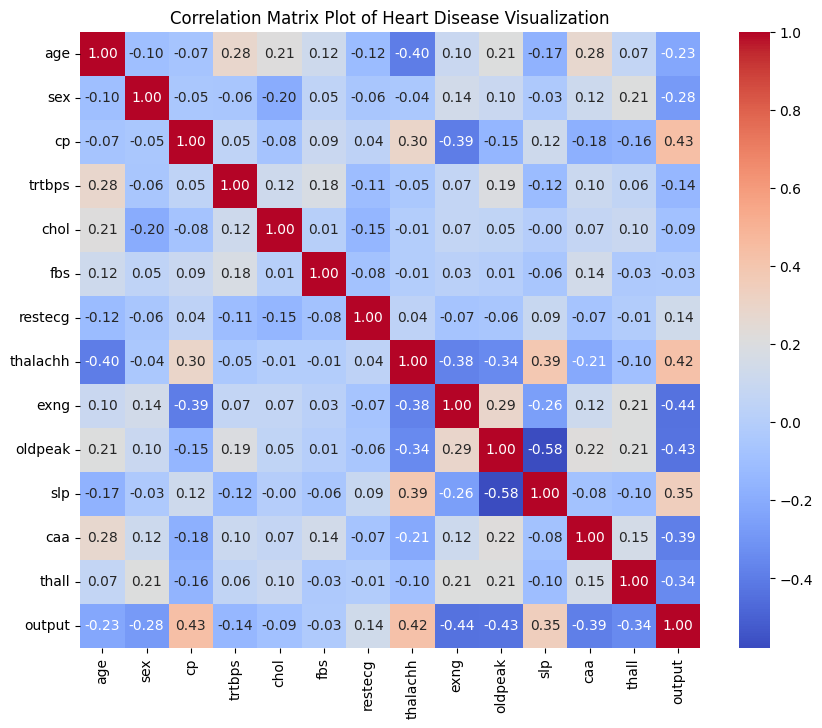

In [5]:
# 02. Heatmap of correlation matrix
plt.figure(figsize=(10, 8))

sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Plot of Heart Disease Visualization')
plt.show()

A correlation matrix visually represents the pairwise correlation coefficients between numerical variables in a dataset. Ihe correlation has been visualized by using a heatmap. 

From the above correlation matrix we can visualize the relationship among the multiple features in the dataset. By looking at correlations between each feature and the target variable (output) we can identify predictors of heart disease. 

---

#### Comments from the Plot  

* The varibles **cp (chest pain type)**, **thalach (maximum heart rate achieved)** and **slp (the slope of the peak exercise ST segment)** have a significant correlation with the **output** variable. Hence we can provide a higher weight to these three features to predict the possibility of a heart disease.  
* The variables **exercise induced angina** and **oldpeak = ST depression induced by exercise relative to rest** have the lowest correlation on predicting the heart disease.  
* A negative correlation between **thalach (maximum heart rate)** and **age** could indicate that the maximum heart rate decreases with age.
* Variables such as **age** and **resting blood pressure** may show a high positive correlation, indicating that older individuals tend to have higher Resting Blood Pressure.
* There is a -0.00 correlation between **slp** and **chol** which could indicate that there is no correlation between the two features, suggesting that there's no linear relationship.

### Parallel Coordinates

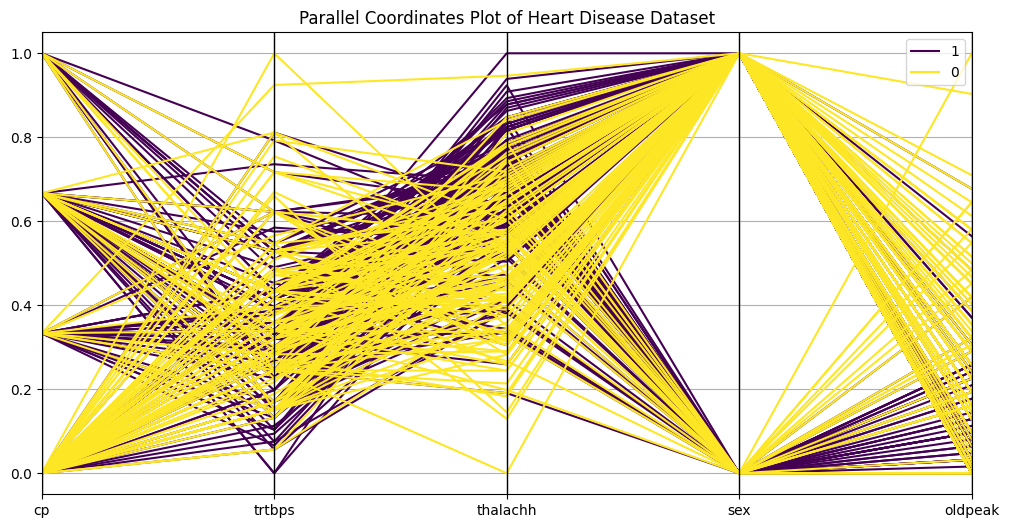

In [6]:
# 03. Parallel Coordinates Plot
# Prepare data
data_subset = df[[ 'cp', 'trtbps', 'thalachh', 'sex', 'oldpeak', 'output']].dropna()

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Normalize the selected features (excluding the target/output column)
features_to_normalize = ['cp', 'trtbps', 'thalachh', 'sex', 'oldpeak']
data_subset[features_to_normalize] = scaler.fit_transform(data_subset[features_to_normalize])


# Plot Parallel Coordinates
plt.figure(figsize=(12, 6))
parallel_coordinates(data_subset, 'output', colormap='viridis')
plt.title('Parallel Coordinates Plot of Heart Disease Dataset')
plt.show()

The Parallel Coordinates Plot visualizes multiple numerical features against the target variable (output) for the Heart Disease Dataset.  
Before plotting the graph, the features **cp (chest pain type), trtbps (resting blood pressure), thalachh (maximum heart rate achieved), sex (gender), and oldpeak (ST depression)** are scaled to a range of 0 to 1 using MinMaxScaler to allow for direct comparison despite differing units.  

#### Color Mapping 
  * *Purple lines* represent patients with heart disease (output = 1).
  * *Yellow lines* represent patients without heart disease (output = 0).
---
#### Comments on the Plot  

* In cp (chest pain type) area, patients with heart disease (purple lines) seem to cluster around higher normalized values for cp, while those without heart disease (yellow lines) are spread out more evenly.  
* Patients with heart disease (purple) generally have lower normalized heart rates ( in thalachh region) compared to those without heart disease (yellow).  
* Patients with heart disease tend to have higher oldpeak values compared to those without.  
* Gender distribution appears relatively consistent but may show slight clustering of heart disease among one gender which is male.
* The patterns are more mixed under trtbps (resting blood pressure) area, with overlap between the two groups, indicating less differentiation based on this variable.
* The plot highlights key differences in thalachh, oldpeak, and cp between the two classes, suggesting these features have stronger predictive power for heart disease.

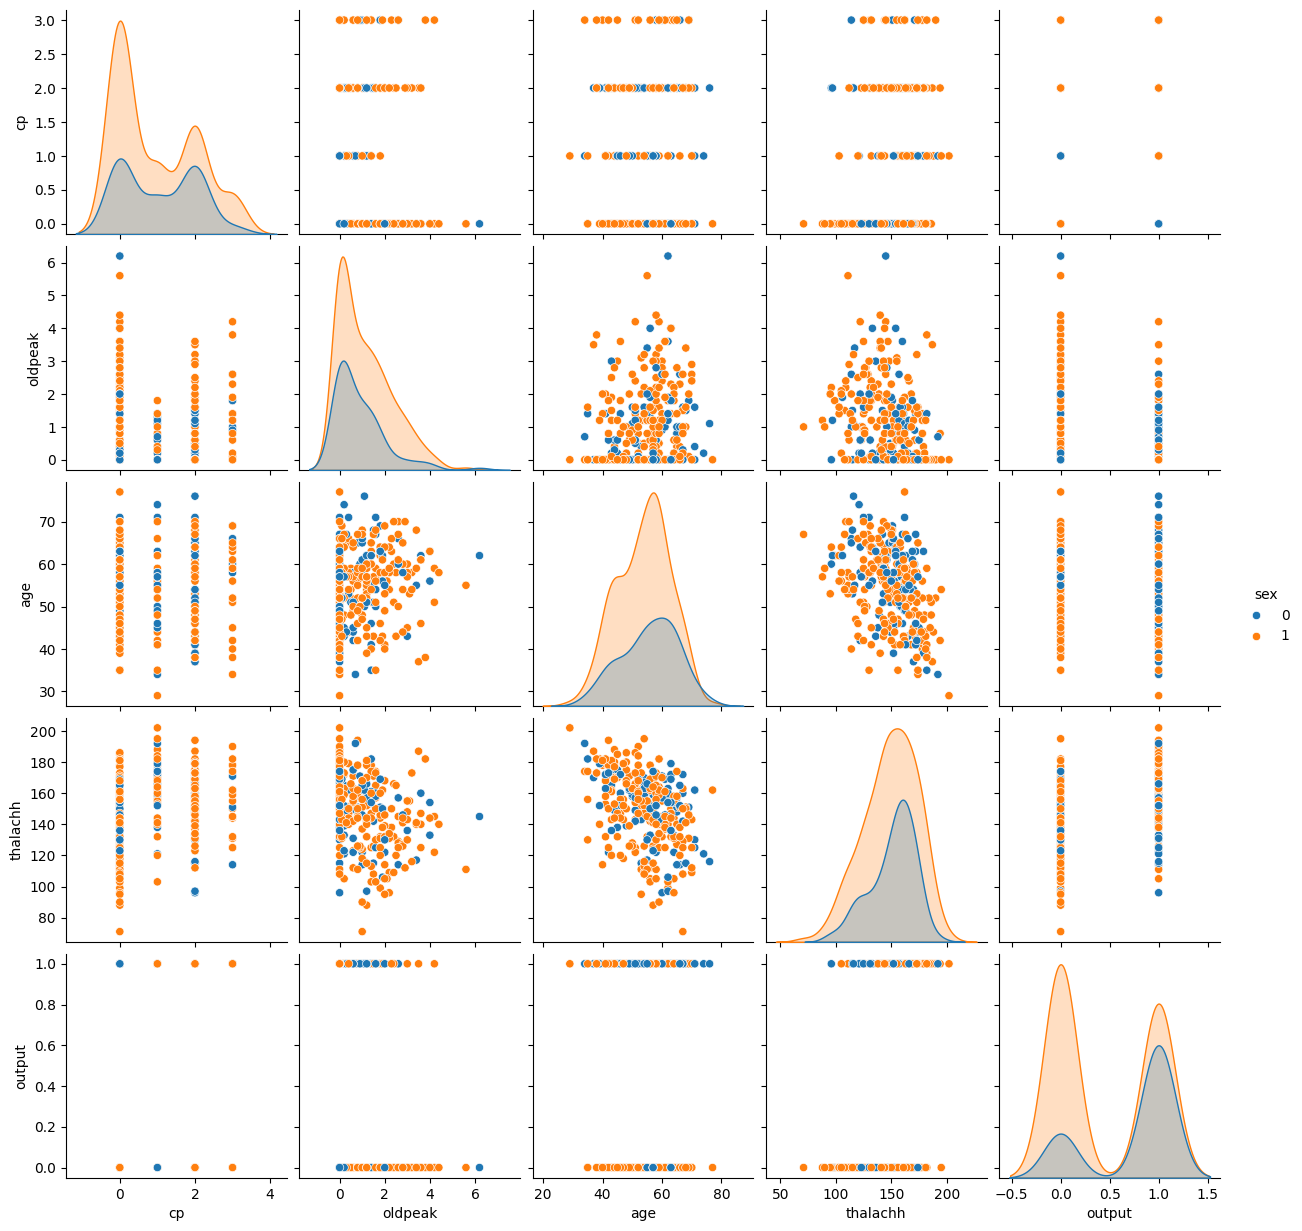

In [7]:
# Scatter Plot: extra plot

#prepare data
df_subset = df[[ 'cp', 'oldpeak', 'age', 'sex', 'thalachh', 'output']]

# Create a scatterplot matrix
sns.pairplot(data=df_subset, hue='sex', diag_kind='kde')
plt.xlabel('Gender (0: Female, 1: Male)')
# Display the plot
plt.show()

#####  2. Divide the dataset into training (80%) and testing (20%) subsets.

In [8]:
# Split the dataset
X = df.drop('output', axis=1)
y = df['output']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

##### 3. Build two classification models (e.g., Logistic Regression, Random Forest, or any suitable model).

In [9]:
# 1. Logistic Regression
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)
lr_train_accuracy = lr_model.score(X_train, y_train)
lr_test_accuracy = lr_model.score(X_test, y_test)

In [10]:
# 2. Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_train_accuracy = rf_model.score(X_train, y_train)
rf_test_accuracy = rf_model.score(X_test, y_test)

##### 4. Calculate and report the training accuracy and testing accuracy for both models.

In [11]:
# Report Accuracies
print(f"Logistic Regression - Train Accuracy: {lr_train_accuracy:.2f}, Test Accuracy: {lr_test_accuracy:.2f}")
print(f"Random Forest - Train Accuracy: {rf_train_accuracy:.2f}, Test Accuracy: {rf_test_accuracy:.2f}")

Logistic Regression - Train Accuracy: 0.85, Test Accuracy: 0.80
Random Forest - Train Accuracy: 1.00, Test Accuracy: 0.84


##### 5. Provide a brief discussion on the performance of each model.

**Logistic Regression:** has a **Training Accuracy of 0.85** which indicates a relatively good fit to the training data. However, it's not overly high, suggesting the model is less likely to overfit to data. The **Test Accuracy is 0.80** which is slightly lower than the training accuracy, this reflects a generalizable performance. The difference of 0.05 suggests the model performs consistently across unseen data. As for the overall performance of the Logistic Regression, it strikes a balance between simplicity and performance. It may underperform if the dataset has complex, non-linear relationships.

**Random Forest:** on the other hand has a **Training Accuracy of 1.00** which indicates a perfect accuracy score on the training data. This indicates potential overfitting. The model might have memorized the training data rather than generalizing patterns. The **Test Accuracy is 0.84** which is higher than for Logistic Regression, this shows that the Random Forest can capture more complex relationships. However, the slight drop from the perfect training accuracy reflects overfitting. The Overall Performance of the model suggests that while it performs well on the test set, with careful tuning (e.g., reducing tree depth, limiting the number of features per split) there are possibilities to improve generalization.

In comparison, **Logistic Regression** is better for interpretability and less risk of overfitting. It is suitable if relationships between variables are primarily linear and **Random Forest** performs better on the test set and can handle non-linear relationships, but risks overfitting without proper tuning.


##### 6. Calculate the absolute difference in test set accuracy between Model A and Model B using the original test labels. Write a conclusion comparing the models based on this difference.

In [12]:
# Accuracy Difference
accuracy_difference = abs(lr_test_accuracy - rf_test_accuracy)
print(f"Absolute Test Accuracy Difference: {accuracy_difference:.2f}")

Absolute Test Accuracy Difference: 0.03


#### Conclusion  

The absolute test accuracy difference between Logistic Regression (0.80) and Random Forest (0.84) is only 0.03, indicating a small performance advantage for the Random Forest model.  
When comparing with regards to the performance, Random Forest slightly outperforms Logistic Regression on the test set, suggesting it captures more complex patterns in the data due to its ensemble nature. However, this marginal improvement in test accuracy may not justify the additional computational complexity of Random Forest, especially for scenarios where simplicity and interpretability are prioritized.  
Random Forest achieves perfect train accuracy of 1.00, which indicates an overfit of the training data. This overfitting may limit its generalization capability. Contrastly, Logistic Regression has a balanced train accuracy of 0.85, shows less overfitting, thus making it a more robust choice for datasets with limited size or variability.  
Logistic Regression offers better interpretability, as its coefficients directly indicate the impact of features on the outcome. This is valuable in medical contexts, such as heart disease prediction, where understanding feature importance is crucial. Similarly Random Forest provides slightly more accurately but lacks straightforward interpretability due to its complexity.

#####  7. Validate the test set performance difference using a permutation test as covered in Chapter 7.


Observed Difference: -0.032786885245901676
P-value: 1.0
Decision: Fail to reject the null hypothesis: No significant difference between the models.


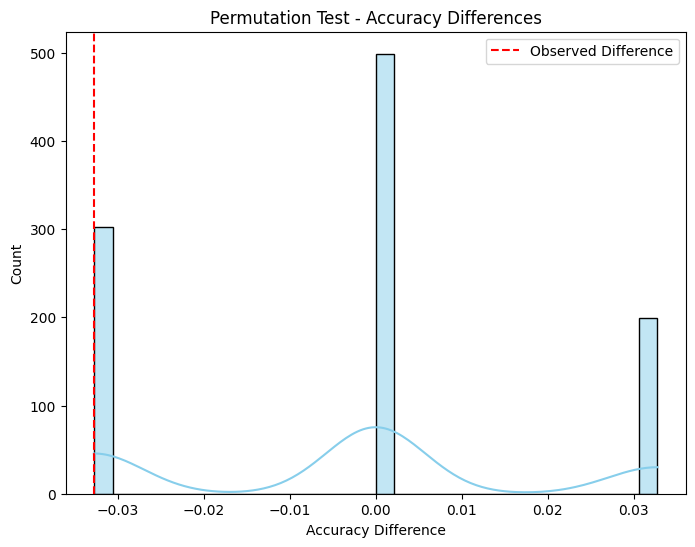

In [14]:
# Observed Statistic - Calculate the observed difference in accuracy between the two models
observed_difference = accuracy_score(y_test, lr_model.predict(X_test)) - accuracy_score(y_test, rf_model.predict(X_test))

# Permutation Test
n_permutations = 1000
accuracy_differences = []

for i in range(n_permutations):
    # Shuffle the test labels to break the relationship with features
    y_permuted = shuffle(y_test, random_state=i)
    
    # Calculate permuted accuracies for both models
    lr_permuted_accuracy = accuracy_score(y_permuted, lr_model.predict(X_test))
    rf_permuted_accuracy = accuracy_score(y_permuted, rf_model.predict(X_test))
    
    # Calculate the difference in accuracies for the permutation
    permuted_difference = lr_permuted_accuracy - rf_permuted_accuracy
    accuracy_differences.append(permuted_difference)

# P-value Calculation
accuracy_differences = np.array(accuracy_differences)
p_value = np.mean(accuracy_differences >= observed_difference)

# Decision Rule and Interpretation
alpha = 0.05  # Significance level
if p_value < alpha:
    decision = "Reject the null hypothesis: Model Logistic Regression performs significantly better than Model Random Forest."
else:
    decision = "Fail to reject the null hypothesis: No significant difference between the models."

print(f"Observed Difference: {observed_difference}")
print(f"P-value: {p_value}")
print(f"Decision: {decision}")

# Plot the Permutation Test Results
plt.figure(figsize=(8, 6))
sns.histplot(accuracy_differences, kde=True, bins=30, color='skyblue')
plt.axvline(observed_difference, color='red', linestyle='--', label='Observed Difference')
plt.title('Permutation Test - Accuracy Differences')
plt.xlabel('Accuracy Difference')
plt.legend()
plt.show()